In [1]:
import tensorflow as tf
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import seaborn as sb

# -------------------------------------------
# Load file contains the ground truth values :

In [2]:
dataset_info_file = Path('../data/FullIJCNN2013/gt.txt')

In [3]:
columns = ["path","left","top","right","bottom","id"]
with open(dataset_info_file) as info:
    data = {}
    lines = info.readlines()
    for idx,line in enumerate(lines):
        data[idx] = {}
        info = line.strip().split(";")
        for i in range(len(columns)):
            if info[i].endswith("ppm"):
                data[idx][columns[i]] = info[i]
            else:
                data[idx][columns[i]] = int(info[i])
            

In [4]:
df = pd.DataFrame(list(data.values()))

In [5]:
df.head()

,path,left,top,right,bottom,id
0,00000.ppm,774,411,815,446,11
1,00001.ppm,983,388,1024,432,40
2,00001.ppm,386,494,442,552,38
3,00001.ppm,973,335,1031,390,13
4,00002.ppm,892,476,1006,592,39


# --------------------------------------
# Load a sample image to check its size :

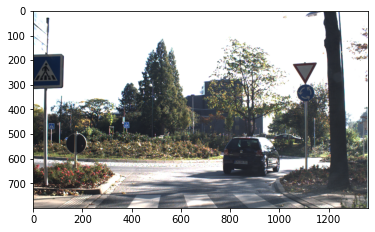

In [6]:
image_path = "../data/FullIJCNN2013/00083.ppm"
img = Image.open(image_path)
plt.imshow(img)

**All images are of size 800*1360 with 3 channels.**

# -----------------------------------------------
# ClassID:

<AxesSubplot:xlabel='id', ylabel='count'>

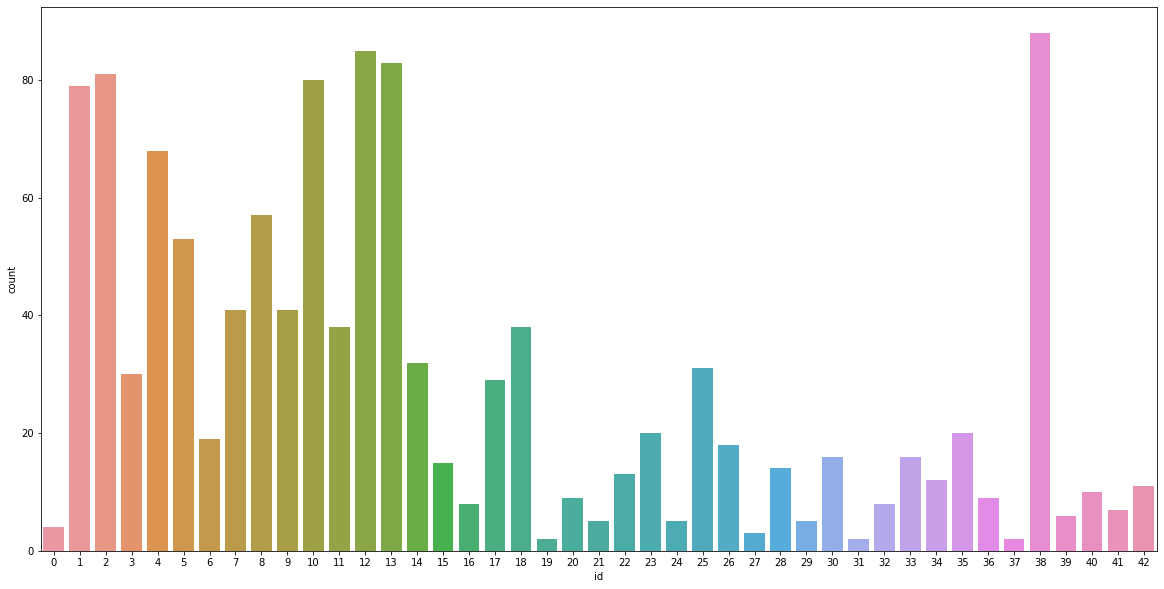

In [7]:
plt.figure(figsize=(20,10))
sb.countplot(x="id",data=df)

# ------------------------------
# Categorize 43 classes to 4 main class :

In [8]:
prohibitory = [0,1,2,3,4,5,7,8,9,10,15,16]
danger = [11,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
mandatory = [33,34,35,36,37,38,39,40]
other = [6,12,13,14,17,32,41,42]

In [9]:
df["object_name"] = df["id"]
for i in range(len(df["id"])):
    if df["id"][i] in prohibitory:
        df["id"].loc[i] = 0
        df["object_name"].loc[i] = "prohibitory"
    elif df["id"][i] in danger:
        df["id"].loc[i] = 1
        df["object_name"].loc[i] = "danger"
    elif df["id"][i] in mandatory:
        df["id"].loc[i] = 2
        df["object_name"].loc[i] = "mandatory"
    elif df["id"][i] in other:
        df["id"].loc[i] = 3
        df["object_name"].loc[i] = "other"
    else:
        df["id"].loc[i] = -1

/home/maziar/anaconda3/envs/TrafficSignDetection/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [10]:
df.head()

,path,left,top,right,bottom,id,object_name
0,00000.ppm,774,411,815,446,1,danger
1,00001.ppm,983,388,1024,432,2,mandatory
2,00001.ppm,386,494,442,552,2,mandatory
3,00001.ppm,973,335,1031,390,3,other
4,00002.ppm,892,476,1006,592,2,mandatory


In [11]:
df.to_csv('../data/FullIJCNN2013/data_info.csv')